In [219]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [178]:

#ok, let's try with a class
class Tree:
    def __init__ (self,name):
        self.name=name
        self.next=[]
        self.components=[self.name]
    def __str__(self):
        return f"{self.name} {self.next}"
    def __repr__(self):
        return f"Tree(name='{self.name}', next={self.next})"
    @classmethod
    def add(cls, tree1, tree2):
        if not tree1.next:
            tree1.next.append(tree2)
        else:
            tree1.next.append(tree2)
        #tree1.name = tree1.name + "," + tree2.name
        tree1.components = tree1.components + tree2.components
        del tree2

In [202]:
matrixx=np.array([["",int(19),"a","b"],["",int(2),"b","c"],["",int(2),"d","c"],["",int(4),"d","b"],["",int(7),"d","a"],["",44,"b","e"]])
print(matrixx)

[['' '19' 'a' 'b']
 ['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '44' 'b' 'e']]


In [203]:
#now to sorting the matrix
sorted_indices = np.lexsort((matrixx[:, 1].astype(int),))
E = matrixx[sorted_indices]
print(E)

[['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '19' 'a' 'b']
 ['' '44' 'b' 'e']]


In [205]:
min0,min1,min2=E[0][1],E[0][2],E[0][3] #extracting minmum path from the sorted matrix (E)
print(min0,min1,min2)

2 b c


In [244]:
names= np.unique(matrixx[:, 2:])
print(names)
name_dict= {letter:i for i, letter in enumerate(names)}
print(name_dict)

trees=[]
for item in names:
    trees.append(Tree(item))
    x=0
for i,item in enumerate(E):
    while len(set(name_dict.values()))>1:
        print("\n \n new loop started")
        print("iteration"+str(x))
        print("dict, begin it"+str(x))
        print(name_dict)
        print("trees, begin it"+str(x))
        print(trees)
        min0,min1,min2=E[x][1],E[x][2],E[x][3] #get the next line in the matrix to get the letters/names of the trees
        tree1_id= name_dict[min1] #getting the positions of the letters in the current list of trees
        tree2_id= name_dict[min2]
        if tree2_id==tree1_id:
            print("i entered the break place with"+ str(tree1_id)+"and"+str(tree2_id))
            x+=1
            break
        else:
            E[x][0]="*"
            print("id tree1:")
            print(tree1_id)
            print("id tree 2:")
            print(tree2_id)
            tree1=trees[tree1_id] #get the first tree
            tree2=trees[tree2_id] #get he second tree
            Tree.add(tree1,tree2) #merge the two trees, meaning that our tree-list gets shorter. PROBLEM THOUGH: the last it. does not fully merge right now----
            trees.pop(tree2_id) #remove the tree that we just merged into another tree
            #name_dict = {key: value if value <= tree1_id else tree1_id for key, value in name_dict.items()}
            if tree1_id<tree2_id:
                name_dict[min2]=tree1_id # update the number associated with the letter/treee in the dictionary
                name_dict = {key: (value - 1) if value > tree1_id else value for key, value in name_dict.items()}
            else:
                name_dict[min1]=tree2_id # update the number associated with the letter/treee in the dictionary
                name_dict = {key: (value - 1) if value > tree2_id else value for key, value in name_dict.items()}
            print("trees and dict after it."+str(x)+":")
            print(trees)
            print(name_dict)
            print(E)
            x+=1
res_mat=E
            

['a' 'b' 'c' 'd' 'e']
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

 
 new loop started
iteration0
dict, begin it0
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}
trees, begin it0
[Tree(name='a', next=[]), Tree(name='b', next=[]), Tree(name='c', next=[]), Tree(name='d', next=[]), Tree(name='e', next=[])]
id tree1:
1
id tree 2:
2
trees and dict after it.0:
[Tree(name='a', next=[]), Tree(name='b', next=[Tree(name='c', next=[])]), Tree(name='d', next=[]), Tree(name='e', next=[])]
{'a': 0, 'b': 1, 'c': 1, 'd': 2, 'e': 3}
[['*' '2' 'b' 'c']
 ['*' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['*' '7' 'd' 'a']
 ['' '19' 'a' 'b']
 ['*' '44' 'b' 'e']]

 
 new loop started
iteration1
dict, begin it1
{'a': 0, 'b': 1, 'c': 1, 'd': 2, 'e': 3}
trees, begin it1
[Tree(name='a', next=[]), Tree(name='b', next=[Tree(name='c', next=[])]), Tree(name='d', next=[]), Tree(name='e', next=[])]
id tree1:
2
id tree 2:
1
trees and dict after it.1:
[Tree(name='a', next=[]), Tree(name='d', next=[Tree(name='b', next=[Tree(name='c', next=[])

In [266]:
#ok, now it could be really funny to see if I can draw the result!! #I start with my result from before.
print(res_mat)
edges=[]

for row in res_mat:
    weight = int(row[1])  # Extract the weight from the second column
    node1 = row[2]  # Extract the first node from the third column
    node2 = row[3]  # Extract the second node from the fourth column
    edges.append((node1, node2, {'weight': weight}))  # Add the tuple to the list

print(edges)

edges_in_min_path=[]

for row in res_mat:
    if row[0]=="*":  # Extract the weight from the second column
        node1 = row[2]  # Extract the first node from the third column
        node2 = row[3]  # Extract the second node from the fourth column
        edge=tuple(sorted([node1,node2]))
        edges_in_min_path.append(edge) # Add the tuple to the list

print(edges_in_min_path)
edges_in_min_path.sort()
print(edges_in_min_path)

[['*' '2' 'b' 'c']
 ['*' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['*' '7' 'd' 'a']
 ['' '19' 'a' 'b']
 ['*' '44' 'b' 'e']]
[('b', 'c', {'weight': 2}), ('d', 'c', {'weight': 2}), ('d', 'b', {'weight': 4}), ('d', 'a', {'weight': 7}), ('a', 'b', {'weight': 19}), ('b', 'e', {'weight': 44})]
[('b', 'c'), ('c', 'd'), ('a', 'd'), ('b', 'e')]
[('a', 'd'), ('b', 'c'), ('b', 'e'), ('c', 'd')]


['a', 'b', 'c', 'd', 'e']
[('a', 'd'), ('a', 'b'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd')]
[('a', 'd'), ('b', 'c'), ('b', 'e'), ('c', 'd')]


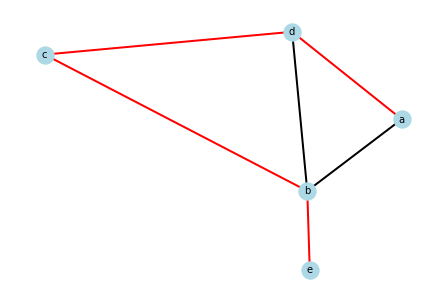

[('a', 'd'), ('b', 'c'), ('b', 'e'), ('c', 'd')]


In [267]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(np.unique(E[:, 2:]))
G.add_edges_from(edges)
shortest_path=edges_in_min_path

print(G.nodes)
print(G.edges)
print(shortest_path)

pos = nx.spring_layout(G)
edge_colors = ['red' if e in shortest_path else 'black' for e in G.edges()] #
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, width=2, font_size=10)

# Show the plot
plt.show() #ummmm it's not coloring the d-b-path... which is strange!!! but otherwise pretty cool

print(edges_in_min_path)